In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from collections import defaultdict
from clustering import Kmeans_cluster
from IPython.display import clear_output

#### Cargar imagenes para clustering

In [2]:
imgs_names = ['imagen', 'imagen1']
imgs = []
for img in imgs_names:
	img_path = f'../img/parte_2-2/{img}.jpg'
	imgs.append(mpimg.imread(img_path))

In [3]:
imgs_X = []
for img in imgs:
	X = (img/255).reshape(img.shape[0]*img.shape[1], 3)
	print(X.shape)
	imgs_X.append(X)

(76800, 3)
(84480, 3)


In [4]:


k_values = [2, 4, 8, 16, 32, 64, 128]
imgs_X_compressed = defaultdict(list)
for i, X in enumerate(imgs_X):
	print("-"*40, imgs_names[i], "-"*40)
	for k in k_values:
		print(f">>> Clustering con k={k}")
		kmeans_cluster = Kmeans_cluster(n_clusters=k)
		X_df = pd.DataFrame(X, columns=['R', 'G', 'B'])
		kmeans_cluster .kmeans_algorithm(X_df, clear_output)
		X_compressed = X.copy()
		labels = kmeans_cluster.get_labels(X_df)
		for j in range(kmeans_cluster.n_clusters):
			mask = (labels == j).to_numpy().ravel()
			if np.any(mask):
				X_compressed[mask,:] = kmeans_cluster.centroids[j]
		X_compressed = X_compressed.reshape(imgs[i].shape[0],imgs[i].shape[1],3)
		imgs_X_compressed[k].append(X_compressed)

---------------------------------------- imagen ----------------------------------------
>>> Clustering con k=2
>>> Clustering con k=4
>>> Clustering con k=8
>>> Clustering con k=16
>>> Clustering con k=32
>>> Clustering con k=64
>>> Clustering con k=128
---------------------------------------- imagen1 ----------------------------------------
>>> Clustering con k=2
>>> Clustering con k=4
>>> Clustering con k=8
>>> Clustering con k=16
>>> Clustering con k=32
>>> Clustering con k=64
>>> Clustering con k=128


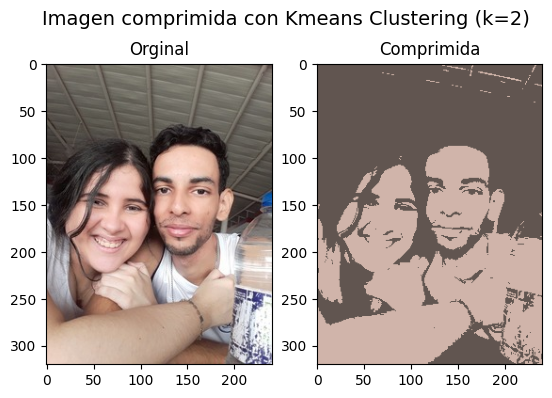

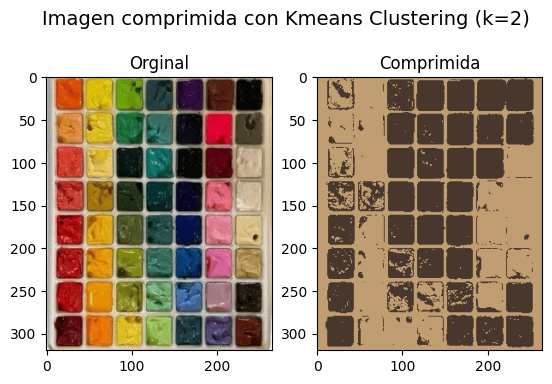

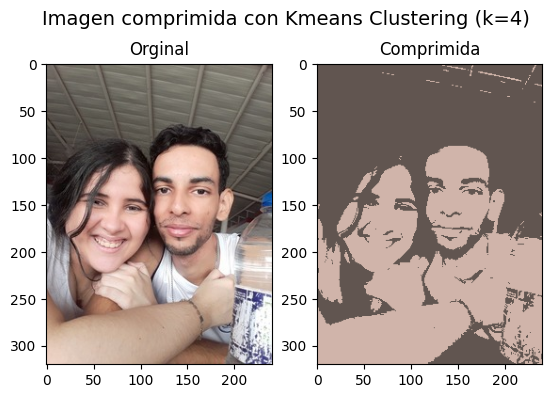

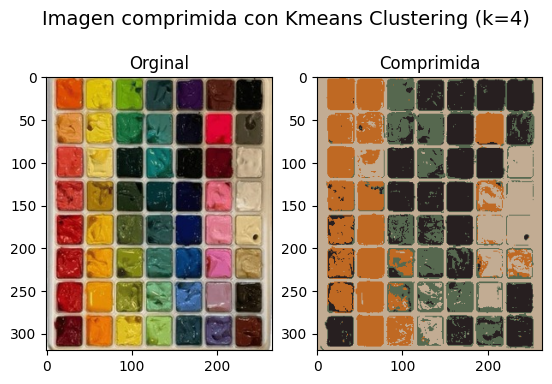

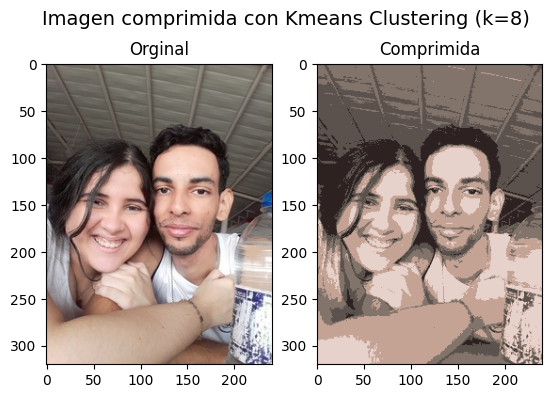

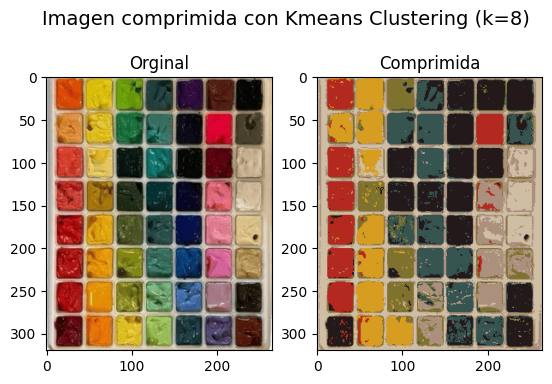

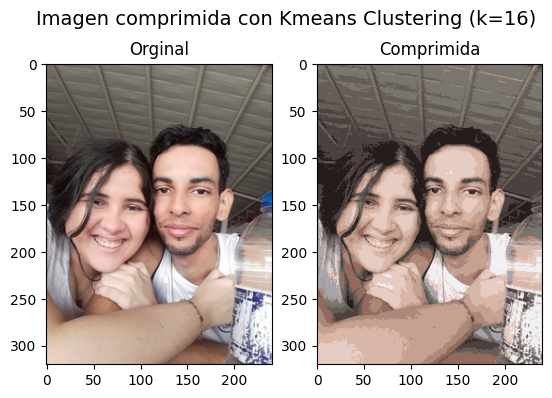

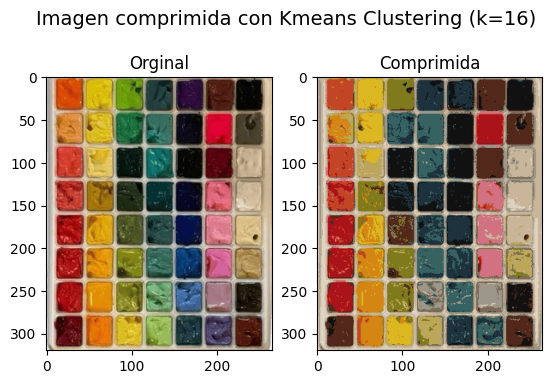

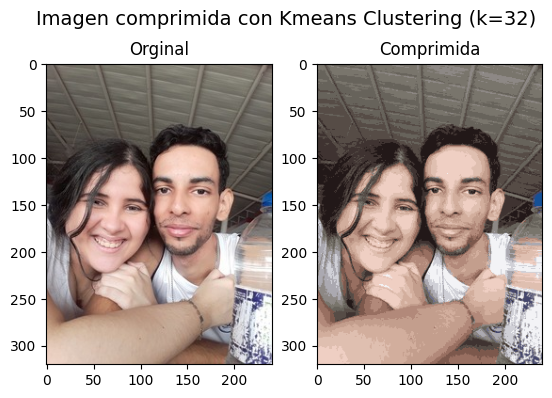

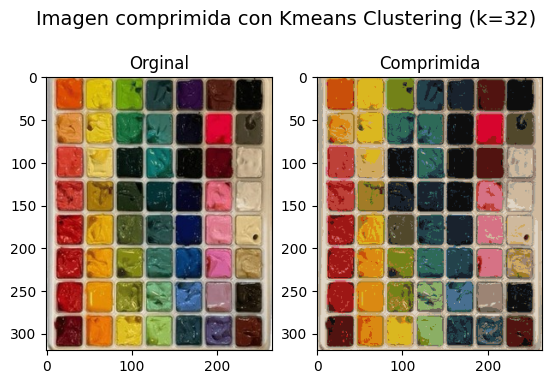

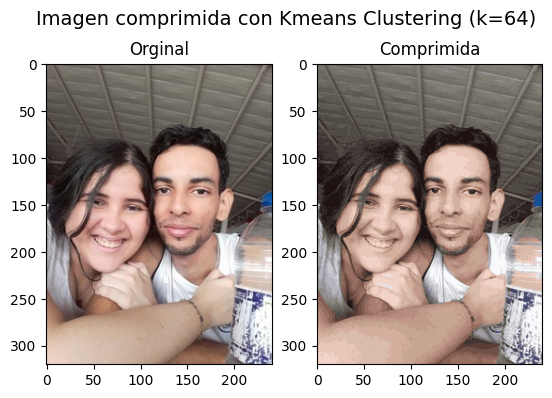

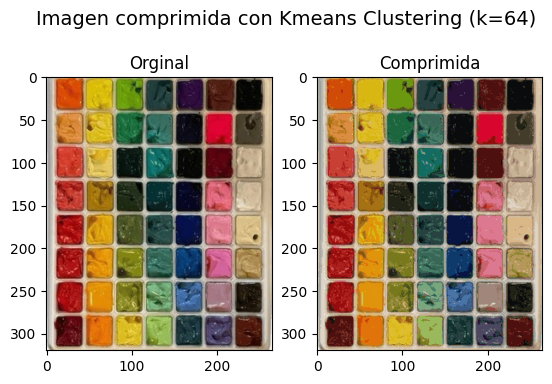

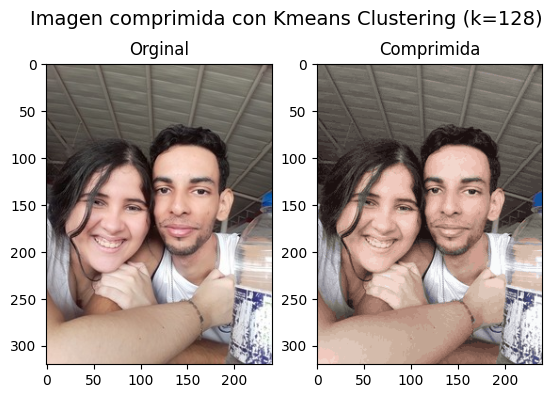

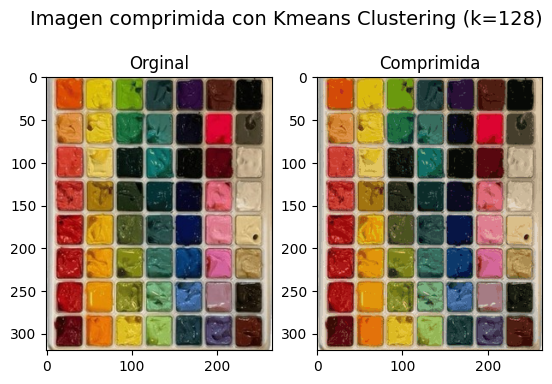

In [ ]:
for key, imgs_compressed in imgs_X_compressed.items():
	for i, X_compressed in enumerate(imgs_compressed):
		fig, ax = plt.subplots(1, 2)
		Img1 = ax[0].imshow(imgs[i])
		Img2 = ax[1].imshow(X_compressed)
		title = ["Orginal", "Comprimida"]
		for j in range(2):
			ax[j].set_title(title[j])
		plt.suptitle(f"Imagen comprimida con Kmeans Clustering (k={key})", fontsize=14, y=0.92)
		plt.savefig(f'../img/parte_2-2/{imgs_names[i]}/comparacion/{imgs_names[i]}_K[{key}].png')
		plt.show()
		# Guardar la imagen comprimida como jpg
		#plt.imsave(f'../img/parte_2-2/{imgs_names[i]}/{imgs_names[i]}_K[{key}].jpg', X_compressed)